Assignment 11
--------------
###Author: Sekhar Mekala


##Value at Risk (VAR) computation for a stock



Importing the required modules
--------------------------------

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import math
import os
import csv
import re
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

Set the current working directory
-----------------------------------

You need to set the current working directory to the directory where the file "apple.2011.csv" resides. In the following code, you will be prompted to enter your choice, if you want to change your current working directory. The default answer for this is N (No). The default behavior is not to change the current working directory, and just proceed with the default directory. 

If you need to change the directory, then you have to answer "y" or "Y" (for Yes option). Then you will be prompted to enter the new desired directory. This new directory must contain the "apple.2011.csv" file.

In [2]:
dir = os.getcwd()
s = raw_input("\nThe current working directory is " + dir +" Do you want to change this? (Y/N. Default is N)==>")
if (s == 'y' or s == 'Y'):
    s = raw_input("\nEnter the directory where the apple.2011.csv resides==>")
    try:
        os.chdir(s)
    except:
        print "\nThe new directory location is invalid. "
        print "\nThe current working directory (" + dir  +") is not changed."
else:
    print "\nUsing the directory: " + dir + " as the current working directory"
dir = os.getcwd()


The current working directory is C:\Users\Sekhar Do you want to change this? (Y/N. Default is N)==>y

Enter the directory where the apple.2011.csv resides==>C:\Users\Sekhar\Documents\Python Scripts


Reading the apple.2011.csv file
---------------------------------

In [3]:
#Set the precision
pd.set_option('precision',11)
try:
     df = pd.read_csv("apple.2011.csv")
except:
     print "Error in reading the file. Check if the file 'apple.2011.csv' exists in the current working directory: \n" + dir
else:
    print "file read successfully"
    
    df.columns = ('date','price','change')
    
    df.set_value(0, 'change', float(0.0))
    df[['price']].astype(float)
    
    #Somehow the df[['change']].astype(float) is not working, so explicitly converting to float as shown below:
    df[['change']] = Series(df['change'],dtype=float)
    
    


file read successfully


Let us plot the histogram for the percentage change, in order to confirm if it has the normal distribution. If the distribution is bell shaped, then it is justified to use random values from normal distribution.

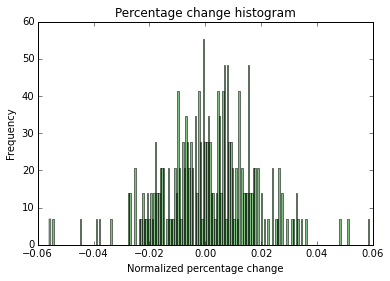

In [4]:
    #print df    
    change_mean = Series(df['change']).mean()
    change_std = Series(df['change']).std()
    
    num_bins = 200
    #n, bins, patches = plt.hist(df['price'], num_bins, normed=1, facecolor='green', alpha=0.5)
    plt.hist(df['change'], num_bins, normed=1, facecolor='green', alpha=0.5)
    plt.title("Percentage change histogram")
    plt.ylabel("Frequency")
    plt.xlabel("Normalized percentage change")
    plt.show()
    

The above histogram shows that the percentage change follows a normal distribution. Hence we can safely use the random numbers from normal distribution.
Let us generate 20 random values from the normal distribution, with mean and standard deviation of percentage change values (this is addressed as "change" column in our data frame). Using these 20 random values, we will get the possible price of the stock at the end of the 20th day. We will repeat this process for 10,000 times, and obtain 10,000 possible prices of the stock at the end of the 20th day. These 10,000 values will be collected into a list object.

In [5]:
    mu = Series(df['change']).mean()
    sigma = Series(df['change']).std()
    
    predict = list()
    for i in range(9999):
        s = np.random.normal(mu, sigma, 20)
        #Adding 1 to all the elements, so that it represents a true multiplier to the previous stock price
        s = s + 1
        
        #Multiplying all the elements in s
        r = np.prod(s)

        #Now multiplying the result obtained above with the last known price (actual price of the stock last known)
        predict.append(list(df['price'])[-1] * r)

    #Let us sort the values obtained
    predict.sort()
    predict_series = Series(predict)
    
    
    
    
   

Calculating the stock value at 99% confidence level
------------------------------------------------------

We will obtain the value at the 1 percentile. The 1 percentile represents that there are 1% of values below this value. NOTE that we sorted the data (which is obtained as an output from 10000 trials) in ascending order. 

The 1 percentile value represents that there is 99% probability that the stock price will not go below this value.

The 1 percentile value is displayed below. 


In [6]:
#Commented the zscore method of calculation. We have to use the percentile, but I am leaving the following commands (commented), for future reference
#zscore = stats.norm.ppf(0.01)
#minimal_stk = (zscore * predict_series.std() ) + predict_series.mean()
#print minimal_stk

predict_series.quantile(.01)
predict_series.quantile(.01)


347.56182434585583